In [1]:
# load data
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/afifai/pelatihan_machinelearning/master/data/train.csv", index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

In [4]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


num_col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat_col = ['Sex']

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_col),
    ('pipe_cat', cat_pipeline, cat_col)
])

In [5]:
# extract feature using pipeline

X_train_final = data_pipeline.fit_transform(X_train)
X_test_final = data_pipeline.fit_transform(X_test)

In [6]:
X_train_final.shape, X_test_final.shape

((712, 7), (179, 7))

## Sequential

In [7]:
#import lib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#model
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(7,))) #input_shape hanya di hidden layer pertama setelah input layer
model.add(Dense(1, activation='sigmoid'))

#compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#train
history = model.fit(X_train_final, y_train, epochs=300, validation_data=(X_test_final, y_test))

Epoch 1/300
23/23 [==============================] - 0s 6ms/step - loss: 0.7397 - accuracy: 0.5239 - val_loss: 0.7434 - val_accuracy: 0.5419
Epoch 2/300
23/23 [==============================] - 0s 1ms/step - loss: 0.7219 - accuracy: 0.5955 - val_loss: 0.7245 - val_accuracy: 0.5978
Epoch 3/300
23/23 [==============================] - 0s 1ms/step - loss: 0.7068 - accuracy: 0.6236 - val_loss: 0.7081 - val_accuracy: 0.6201
Epoch 4/300
23/23 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.6503 - val_loss: 0.6924 - val_accuracy: 0.6369
Epoch 5/300
23/23 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.6657 - val_loss: 0.6799 - val_accuracy: 0.6592
Epoch 6/300
23/23 [==============================] - 0s 1ms/step - loss: 0.6691 - accuracy: 0.6896 - val_loss: 0.6674 - val_accuracy: 0.6760
Epoch 7/300
23/23 [==============================] - 0s 2ms/step - loss: 0.6580 - accuracy: 0.6994 - val_loss: 0.6556 - val_accuracy: 0.7039
Epoch 8/300
2

In [8]:
import pandas as pd
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.739709,0.523876,0.743433,0.541899
1,0.721922,0.595506,0.724471,0.597765
2,0.706768,0.623595,0.708061,0.620112
3,0.693403,0.650281,0.692354,0.636872
4,0.680957,0.665730,0.679861,0.659218


<AxesSubplot:>

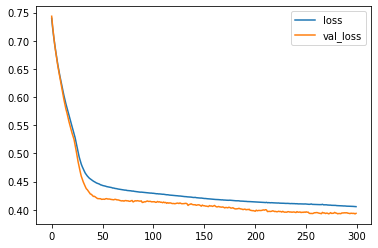

In [9]:
import matplotlib.pyplot as plt
metrics[['loss','val_loss']].plot()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 32        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [11]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


## Functional API

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 32        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
23/23 [==============================] - 0s 5ms/step - loss: 0.9590 - accuracy: 0.4733 - val_loss: 0.8517 - val_accuracy: 0.4693
Epoch 2/300
23/23 [==============================] - 0s 1ms/step - loss: 0.8893 - accuracy: 0.4860 - val_loss: 0.7937 - val_accuracy: 0.4860
Epoch 3/300
23/23 [============================

<AxesSubplot:>

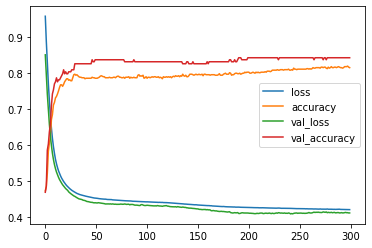

In [12]:
# fungsi API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# fungsi layer
data_in = Input(shape=(7,))
hidden_1 = Dense(4, activation='relu')(data_in)
out = Dense(1, activation='sigmoid')(hidden_1)

# combine
model = Model(inputs=data_in, outputs=out)

# compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

# train
history = model.fit(X_train_final, y_train, epochs=300, validation_data=(X_test_final, y_test))

metrics = pd.DataFrame(history.history)
metrics.plot()

In [13]:
#inference
import numpy as np
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_final)
y_pred = np.where(y_pred > 0.5, 1, 0)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       104
           1       0.89      0.72      0.79        75

    accuracy                           0.84       179
   macro avg       0.85      0.83      0.83       179
weighted avg       0.85      0.84      0.84       179



## MNIST Classification

In [29]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0

In [30]:
def show_image(image):
  plt.imshow(image, cmap='binary')

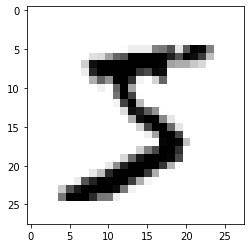

In [31]:
show_image(X_train[0])

In [32]:
y_train[0]

5

In [33]:
X_train.shape

(60000, 28, 28)

In [34]:
from sklearn.model_selection import train_test_split

#split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=46, test_size=0.1)

In [35]:
from tensorflow.keras.utils import to_categorical

y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)
y_val_ohe = to_categorical(y_val)

In [36]:
y_train[0],y_train_ohe[0]

(0, array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

In [37]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

# compile
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train
history = model.fit(X_train, y_train_ohe, epochs=50, batch_size=128, validation_data=(X_val, y_val_ohe))

metrics = pd.DataFrame(history.history)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               200960    
                                                                 
 dense_8 (Dense)             (None, 32)                8224      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 209,514
Trainable params: 209,514
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
422/422 [==============================] - 1s 2ms/step - loss: 0.3351 - accuracy: 0.9068 - val_loss: 0.1369 - val_accuracy: 0.9600
Epoch 2/50
422/422 [==================

<AxesSubplot:>

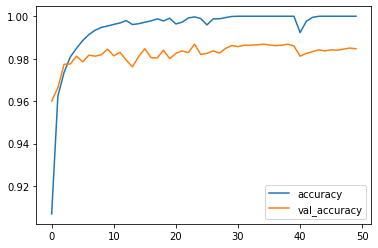

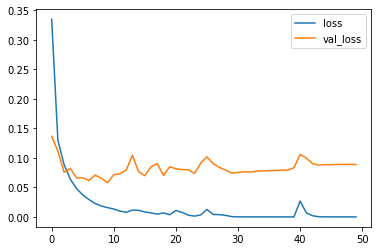

In [38]:
metrics[['accuracy','val_accuracy']].plot()
metrics[['loss','val_loss']].plot()

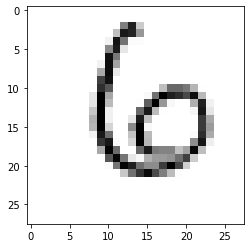

In [39]:
new_data = X_test[100]
show_image(new_data)

In [40]:
pred = model.predict(new_data.reshape((-1,28,28)))
pred.argmax()

6

In [41]:
y_test[100]

6

In [42]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

